# Early stopping

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree 


X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 2,
                            n_redundant = 0, n_classes = 3, random_state = 10, 
                           flip_y = 0.02, class_sep = 1, n_clusters_per_class = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 32)

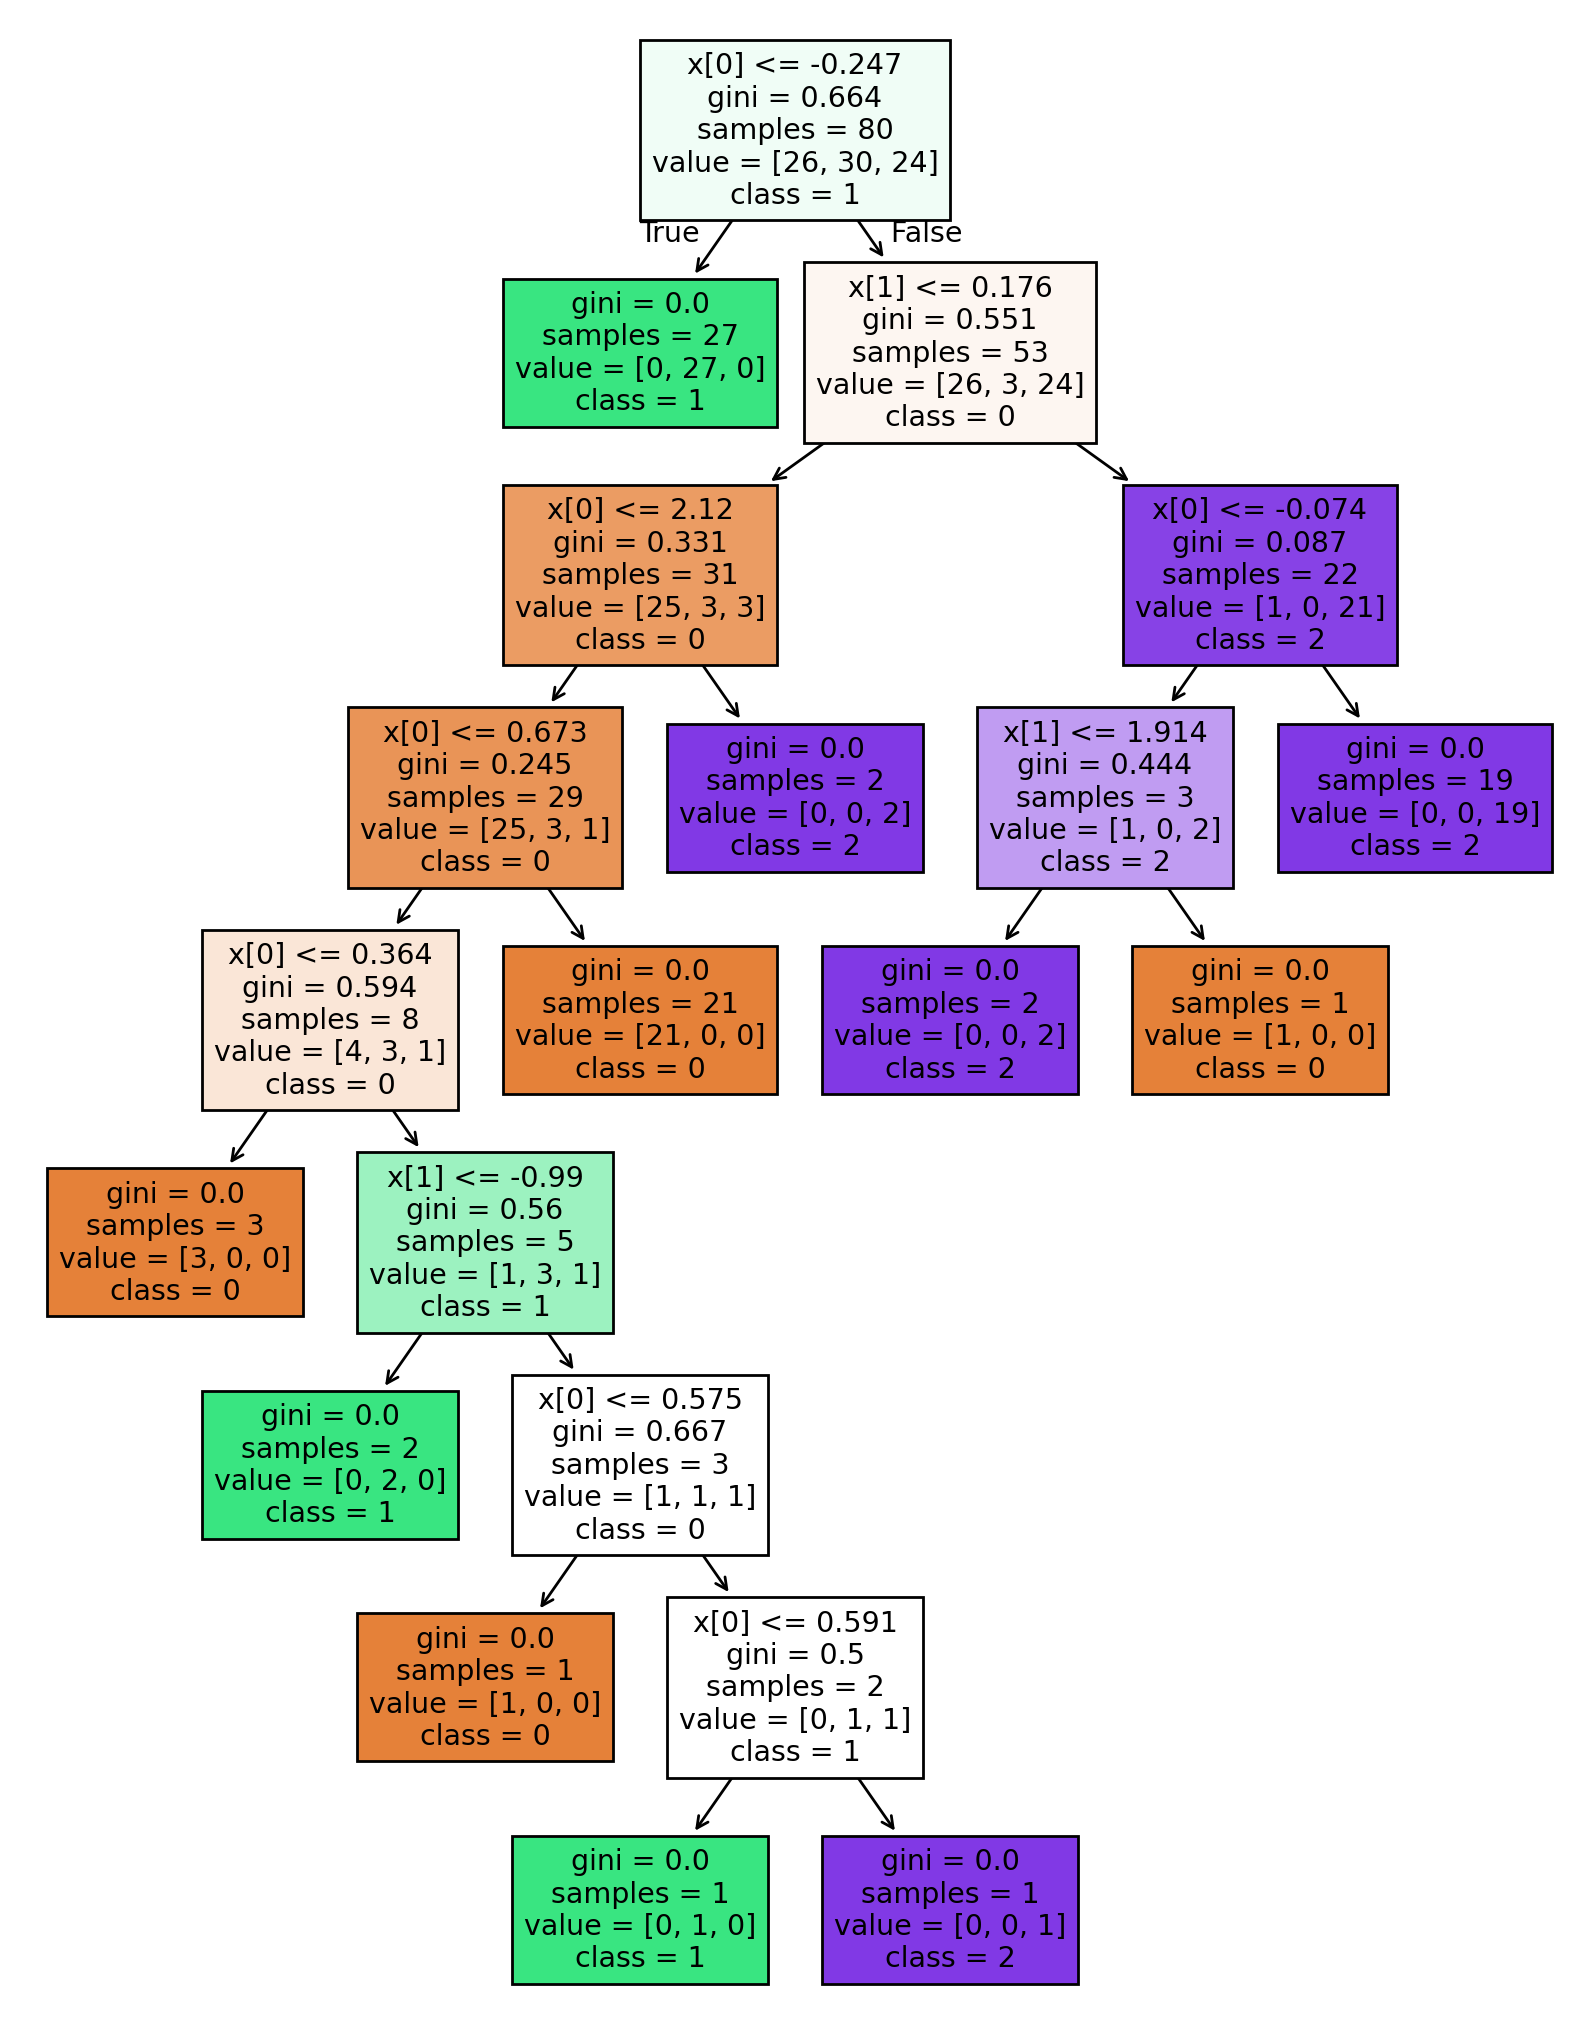

Training Accuracy: 1.0
Test Accuracy 0.75


In [18]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Train a decision tree with default parameters
clf1 = DecisionTreeClassifier(random_state = 12)   # Every time we will set random_state to 12
clf1.fit(X_train, y_train)  

# Plot the tree structure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,13), dpi=200)
plot_tree(clf1, feature_names=X_train.columns if hasattr(X_train, "columns") else None, 
          class_names=[str(cls) for cls in clf1.classes_],
          filled=True)
plt.show()

print("Training Accuracy:", accuracy_score(y_train, clf1.predict(X_train)))
print("Test Accuracy",accuracy_score(y_test, clf1.predict(X_test)))

## Depth limitation

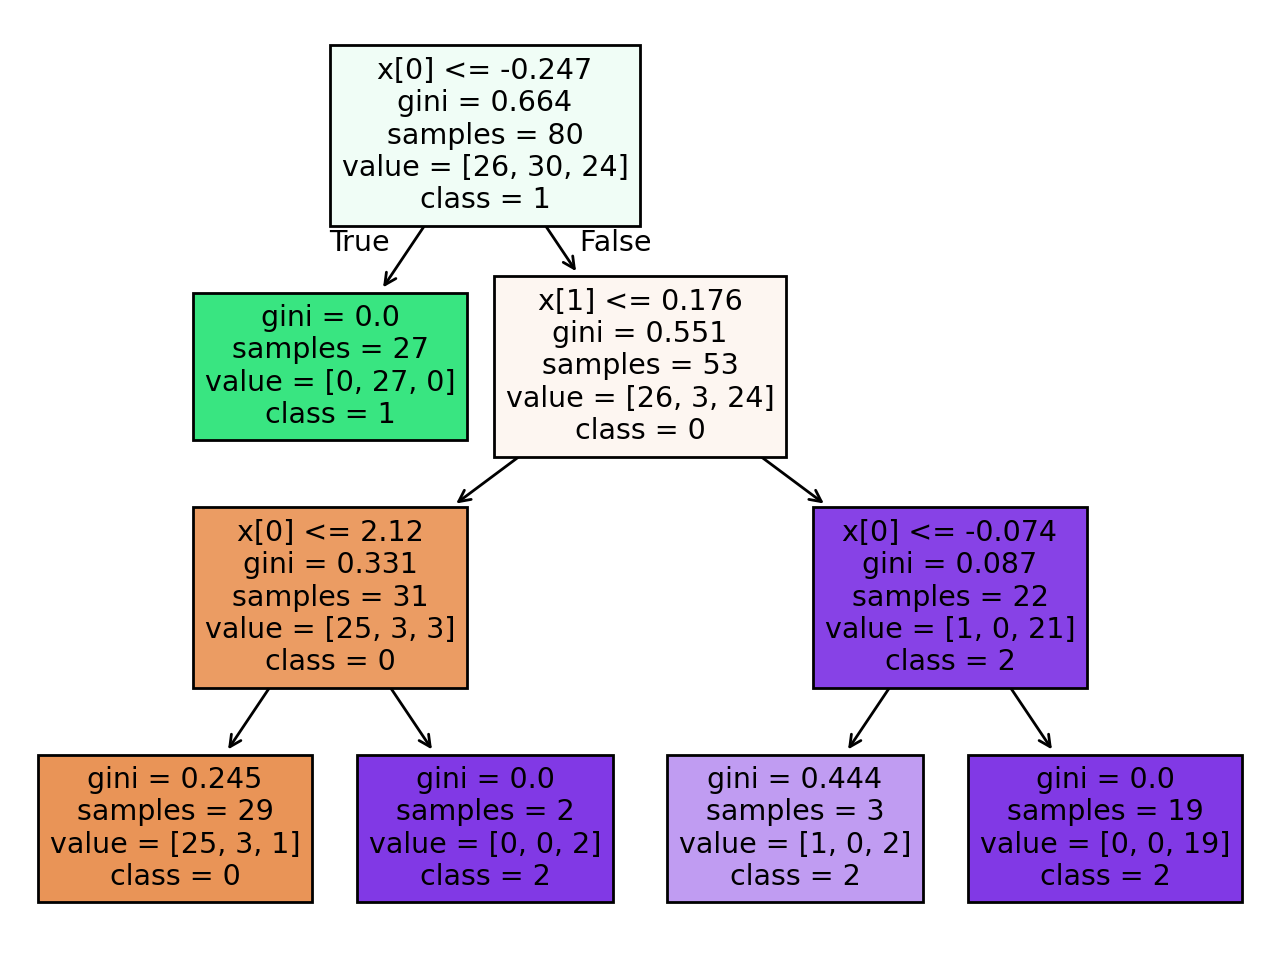

Training Accuracy: 0.9375
Test Accuracy 0.85


In [16]:
clf2 = DecisionTreeClassifier(max_depth=3, random_state = 12)   # Every time we will set random_state to 12
clf2.fit(X_train, y_train)  

# Plot the tree structure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=200)
plot_tree(clf2, feature_names=X_train.columns if hasattr(X_train, "columns") else None, 
          class_names=[str(cls) for cls in clf1.classes_],
          filled=True)
plt.show()

from sklearn.metrics import accuracy_score
print("Training Accuracy:", accuracy_score(y_train, clf2.predict(X_train)))
print("Test Accuracy",accuracy_score(y_test, clf2.predict(X_test)))

## Impurity threshold

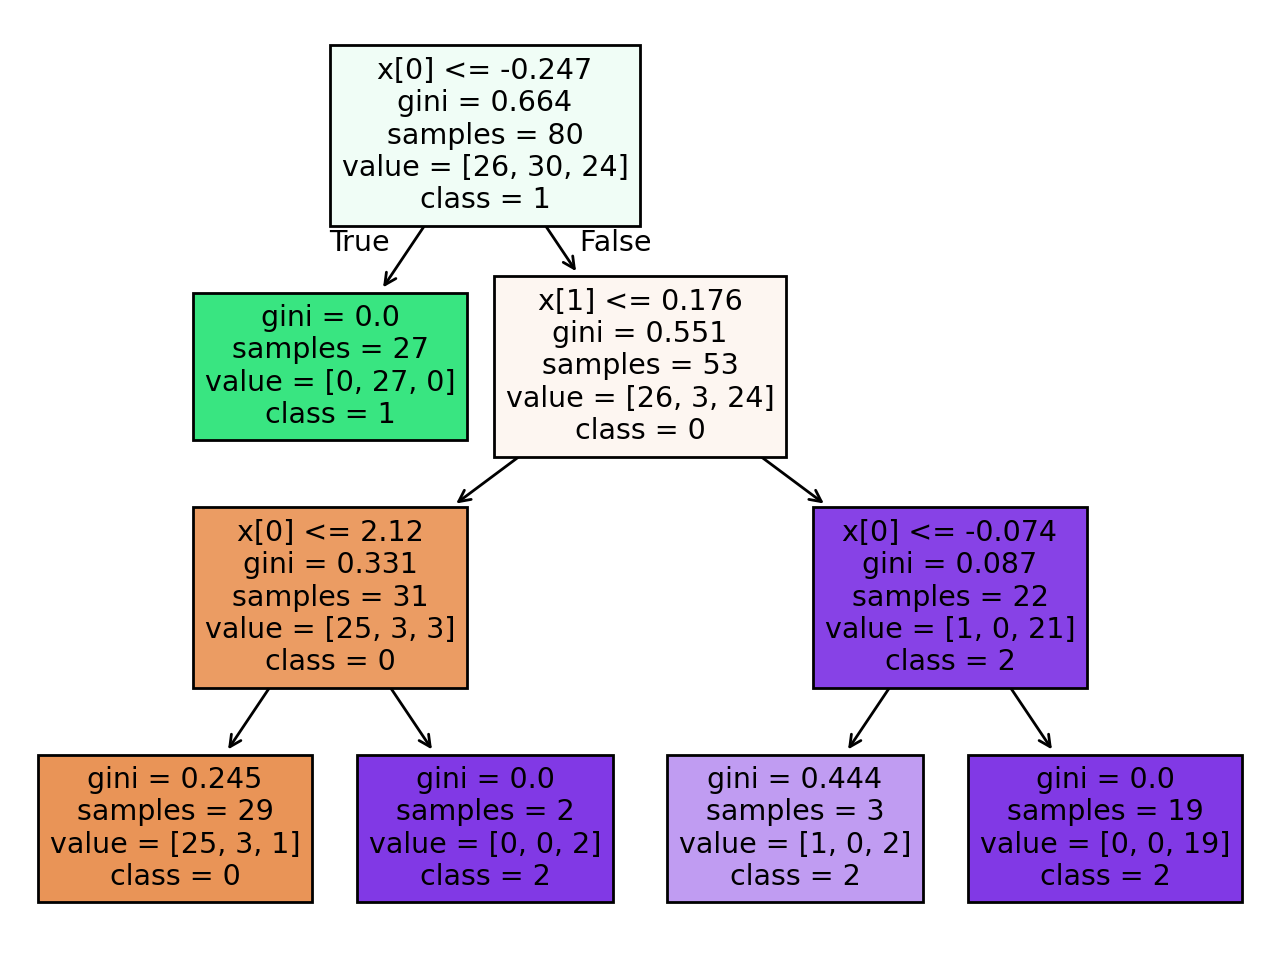

Training Accuracy: 0.9125
Test Accuracy 0.85


In [20]:
clf3 = DecisionTreeClassifier(min_impurity_decrease = 0.1, random_state = 12)
clf3.fit(X_train, y_train)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=200)
plot_tree(clf2, feature_names=X_train.columns if hasattr(X_train, "columns") else None, 
          class_names=[str(cls) for cls in clf1.classes_],
          filled=True)
plt.show()

from sklearn.metrics import accuracy_score
print("Training Accuracy:", accuracy_score(y_train, clf3.predict(X_train)))
print("Test Accuracy",accuracy_score(y_test, clf3.predict(X_test)))